In [588]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tvDatafeed import TvDatafeed, Interval
import mplfinance as mpf
import pandas as pd
import ta  # module for technical indicators
import ta.momentum
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [589]:
path = "../../data/reg_dataset.csv"
df = pd.read_csv(path)

In [590]:
data = df

features = data.drop(columns=['Target'])
target = data['Target']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

split_index = int(len(features_scaled) * 0.75)
X_train, X_test = features_scaled[:split_index], features_scaled[split_index:]
y_train, y_test = target[:split_index], target[split_index:]

In [591]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor MSE: {rf_mse}")

Random Forest Regressor MSE: 1.1118818635030838


In [592]:
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost Regressor MSE: {xgb_mse}")

XGBoost Regressor MSE: 1.3946815543781421


In [593]:
print(f"Random Forest Predictions: {rf_predictions[:5]}")
print(f"XGBoost Predictions: {xgb_predictions[:5]}")

Random Forest Predictions: [-0.36095527 -0.25344671 -0.21488478  0.31275806  0.30802059]
XGBoost Predictions: [-0.4017783  -0.2838491  -0.3638468   0.41446862  0.08587151]


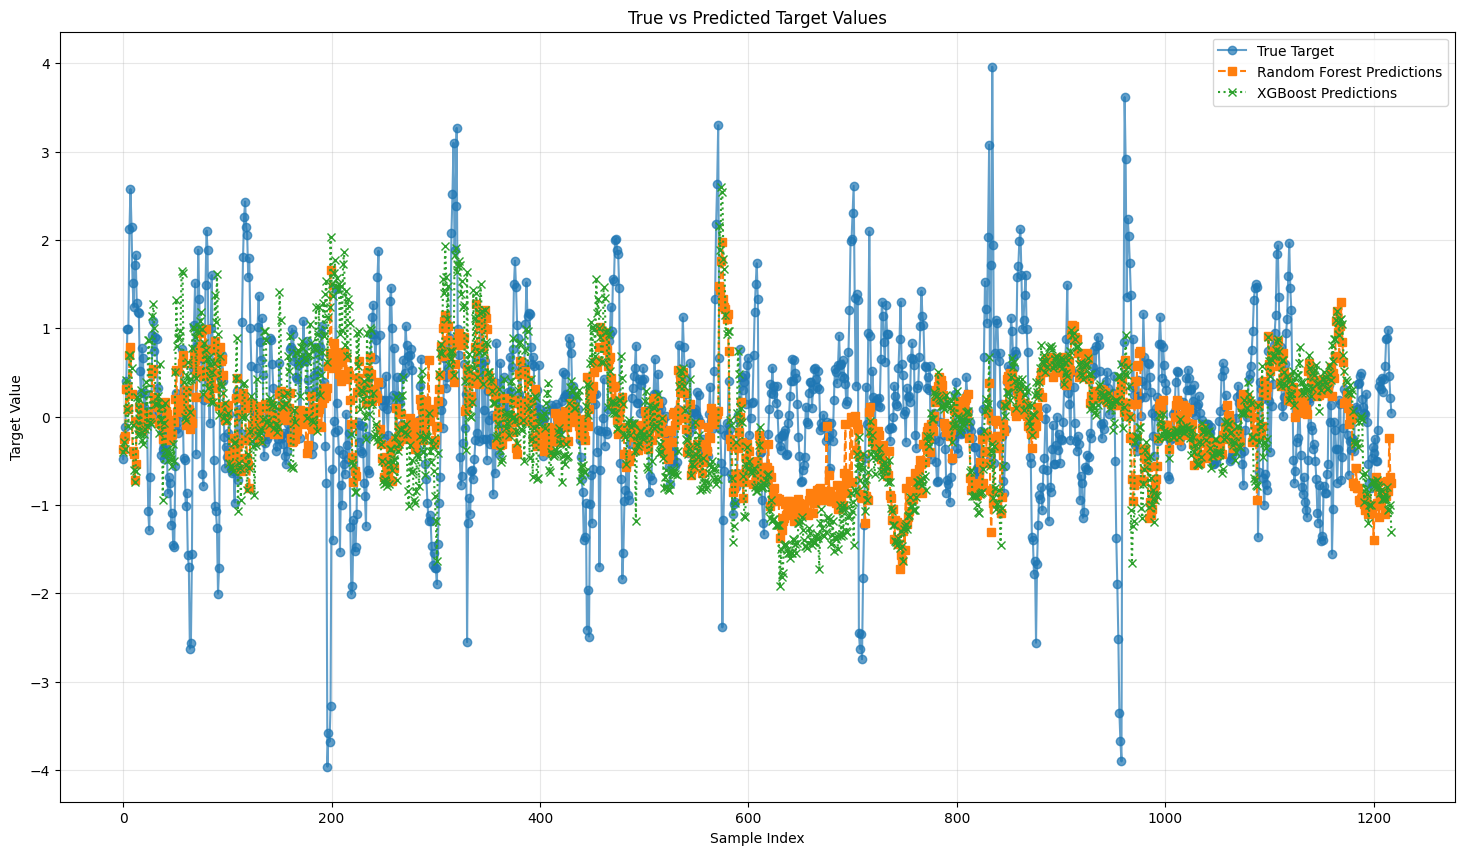

In [594]:
import matplotlib.pyplot as plt

# Visualize Predictions
plt.figure(figsize=(18, 10))
plt.plot(range(len(y_test)), y_test, label="True Target", marker='o', alpha=0.7)
plt.plot(range(len(y_test)), rf_predictions, label="Random Forest Predictions", marker='s', linestyle='--')
plt.plot(range(len(y_test)), xgb_predictions, label="XGBoost Predictions", marker='x', linestyle=':')
plt.title("True vs Predicted Target Values")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [595]:
from sklearn.metrics import r2_score
rf_r2 = r2_score(y_test, rf_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"Random Forest R2 Score: {rf_r2}")
print(f"XGBoost R2 Score: {xgb_r2}")


Random Forest R2 Score: -0.44224998687161654
XGBoost R2 Score: -0.8090765930425508


**LSTM:**

In [576]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Assuming df is already loaded and processed as in the previous steps

# Features and Target
features = df.drop(columns=['Target'])
target = df['Target']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Prepare the data for LSTM: reshape it into 3D array (samples, time_steps, features)
n_time_steps = 5  # The number of time steps (previous periods you want to use for prediction)
n_features = features_scaled.shape[1]

X = []
y = []

# Create time windows (samples) for the LSTM model
for i in range(n_time_steps, len(features_scaled)):
    X.append(features_scaled[i - n_time_steps:i])  # Collect previous n_time_steps rows
    y.append(target.iloc[i])  # The target value (next period's return)

X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
split_index = int(len(X) * 0.75)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [577]:
# Building the LSTM model for regression
model = Sequential()

# Add the LSTM layers
model.add(LSTM(units=10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to avoid overfitting

model.add(LSTM(units=10, return_sequences=True))  # Second LSTM layer
model.add(Dropout(0.2))

model.add(LSTM(units=10, return_sequences=False))  # ThirdLSTM layer
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))  # No activation for regression (linear output)

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


/home/pedro/python_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_95 (LSTM)                  │ (None, 5, 10)          │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 5, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_96 (LSTM)                  │ (None, 5, 10)          │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 5, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_97 (LSTM)                  │ (None, 10)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,411 (9.42 KB)

 Trainable params: 2,411 (9.42 KB)

 Non-trainable params: 0 (0.00 B)

In [578]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.0527 - val_loss: 0.7806
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0576 - val_loss: 0.7870
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0664 - val_loss: 0.7963
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9950 - val_loss: 0.8125
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0667 - val_loss: 0.8277
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0301 - val_loss: 0.8479
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0523 - val_loss: 0.8394
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9741 - val_loss: 0.8558
Epoch 9/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0250 - val_loss: 0.8725
Epoch 10/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9852 - val_loss: 0.8759


In [579]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss}')

# Predictions
y_pred = model.predict(X_test)

# You can also calculate performance metrics such as RMSE or R^2
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2: {r2}')


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0292
Test Loss (MSE): 0.8759339451789856
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Root Mean Squared Error (RMSE): 0.9359133619306408
R^2: -0.13563750008314646
